# Propser Loan Data Exploration
## by Tosin Kolawole

## Introduction
Prosper is a P2P lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors. This document explores a peer-to-peer loan information containing 113,937 loans from Prosper Funding LLC with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

We'll load in the dataset and check the information present in it.

In [2]:
pld = pd.read_csv('prosperLoanData.csv')

In [3]:
pld.shape

(113937, 81)

In [4]:
pld.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


There are 81 columns and 113, 937 observations present in the dataset. Not every variable is needed for analysis, so we'll create a subset of the data containing just the variables needed.

In [5]:
variables = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'LoanOriginalAmount', 'ProsperRating (Alpha)']
plds = pld[variables]

In [6]:
plds.head()

,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,ProsperRating (Alpha)
0,Completed,0.16516,Self-employed,3083.333333,True,9425,NaN
1,Current,0.12016,Employed,6125.000000,True,10000,A
2,Completed,0.28269,Not available,2083.333333,True,3001,NaN
3,Current,0.12528,Employed,2875.000000,True,10000,A
4,Current,0.24614,Employed,9583.333333,True,15000,D


In [7]:
plds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
EmploymentStatus         111682 non-null object
StatedMonthlyIncome      113937 non-null float64
IncomeVerifiable         113937 non-null bool
LoanOriginalAmount       113937 non-null int64
ProsperRating (Alpha)    84853 non-null object
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 5.3+ MB


## Cleaning 

Here, we'll check for duplicates and null values and proceed to remove them from the dataset.

In [8]:
sum(plds.duplicated())

8214

We observe that there are 1778 duplicated values which could be as a result of different reason. We'll go ahead and remove them. 

In [9]:
plds.drop_duplicates(inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
sum(plds.duplicated())

0

After dropping the duplicates we can confirm they are no longer present in the dataset. we then proceed to check for null values.

In [11]:
plds.isnull().sum()

LoanStatus                   0
BorrowerAPR                 25
EmploymentStatus          2240
StatedMonthlyIncome          0
IncomeVerifiable             0
LoanOriginalAmount           0
ProsperRating (Alpha)    28753
dtype: int64

There are some null values present in variables; 'BorrowerAPR', 'EmploymentStatus', 'DebtToIncomeRatio' and 'ProsperRating (Alpha)'. We drop these null values from the dataset.

In [12]:
plds.dropna(inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
plds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76970 entries, 1 to 113936
Data columns (total 7 columns):
LoanStatus               76970 non-null object
BorrowerAPR              76970 non-null float64
EmploymentStatus         76970 non-null object
StatedMonthlyIncome      76970 non-null float64
IncomeVerifiable         76970 non-null bool
LoanOriginalAmount       76970 non-null int64
ProsperRating (Alpha)    76970 non-null object
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 4.2+ MB


After dropping the duplicates and null values, we now have 76,385 valid observations.

### What is the structure of your dataset?

The dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others). Most variables are numeric and categorical in nature.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for determining what affects the borrower's APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that LoanStatus, EmploymentStatus, StatedMonthlyIncome, IncomeVerifiable, LoanOriginalAmount and ProsperRating (Alpha) will have effects on the APR. However, the total loan amount will also have an effect on the APR. A larger loan will imply a lower APR.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Borrower's APR.

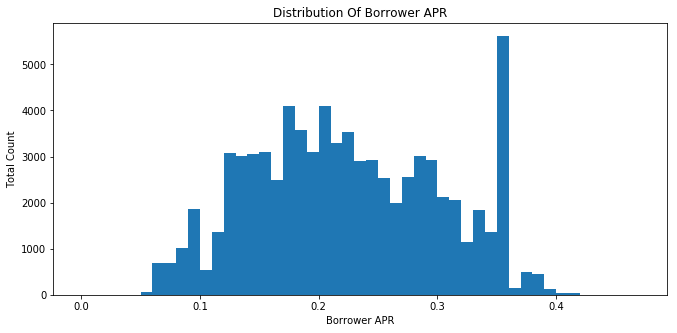

In [14]:
bins = np.arange(0, plds['BorrowerAPR'].max()+ 0.05, 0.01)

plt.figure(figsize=[11, 5])
plt.hist(data = plds, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Total Count')
plt.title('Distribution Of Borrower APR')
plt.show()

> Observation: The distribution of Borrower's APR appears to be multimodal. We can observe a peak at 0.1 and a bigger one at 0.2. It then goes on a downward trend with another peak at 0.29 and a sudden spike at 0.35. 



We'll observe the loan status.

In [15]:
plds['LoanStatus'].value_counts()

Current                   49924
Completed                 18845
Chargedoff                 4968
Defaulted                   992
Past Due (1-15 days)        793
Past Due (31-60 days)       359
Past Due (61-90 days)       308
Past Due (91-120 days)      301
Past Due (16-30 days)       262
FinalPaymentInProgress      202
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

Observation: We observe that we have different past due durations which implies the amount of days by which a loan payment is behind. But for the purpose of this project, we'll combine these multiple variables (Past due) into one variable.

In [16]:
plds.loc[plds['LoanStatus'].str.contains('Past Due'), 'LoanStatus'] = 'Past Due'
plds[plds['LoanStatus']=="Past Due"].head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,ProsperRating (Alpha)
12,Past Due,0.17969,Employed,2416.666667,True,4000,B
82,Past Due,0.33286,Employed,4166.666667,True,4000,E
139,Past Due,0.33973,Other,1835.416667,True,2500,E
508,Past Due,0.30532,Employed,2099.000000,True,4500,D
597,Past Due,0.17849,Employed,5533.333333,True,23500,A


In [17]:
plds['LoanStatus'].value_counts()

Current                   49924
Completed                 18845
Chargedoff                 4968
Past Due                   2039
Defaulted                   992
FinalPaymentInProgress      202
Name: LoanStatus, dtype: int64

In [18]:
plds.dtypes

LoanStatus                object
BorrowerAPR              float64
EmploymentStatus          object
StatedMonthlyIncome      float64
IncomeVerifiable            bool
LoanOriginalAmount         int64
ProsperRating (Alpha)     object
dtype: object

After successfully combining the Past due variables, we observe that the data type for loan status is 'string'. We'll go ahead and convert this to 'category'

In [19]:
loanstatus_cat = plds['LoanStatus'].value_counts().index
categ = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_cat)
plds['LoanStatus'] = plds['LoanStatus'].astype(categ)
plds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76970 entries, 1 to 113936
Data columns (total 7 columns):
LoanStatus               76970 non-null category
BorrowerAPR              76970 non-null float64
EmploymentStatus         76970 non-null object
StatedMonthlyIncome      76970 non-null float64
IncomeVerifiable         76970 non-null bool
LoanOriginalAmount       76970 non-null int64
ProsperRating (Alpha)    76970 non-null object
dtypes: bool(1), category(1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


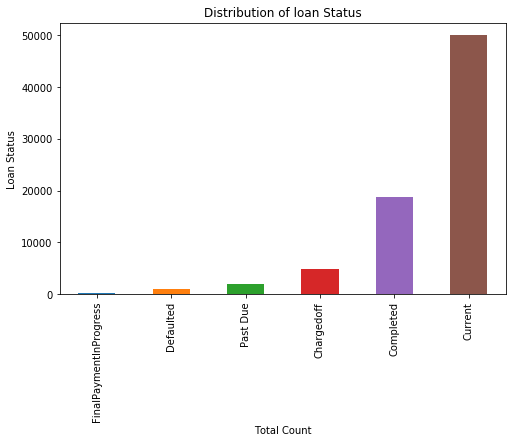

In [20]:
loanstatus_ = plds.LoanStatus.value_counts().sort_values(ascending = True)
plt.figure(figsize=[8, 5])
loanstatus_.plot(kind = 'bar', grid = False)
plt.ylabel('Loan Status')
plt.xlabel('Total Count')
plt.title('Distribution of loan Status');

> Observation: Majority of the loans are currently running, and a good number have been completed. About 4000+ loans are tagged "chargedoff" which means those accounts have been written off as loss. A few loans are pastdue while a handful have been defaulted. 

We'll proceed to observe the Employment Status.

First, we'll convert the employment status to categorical data type.

In [21]:
empsta = plds['EmploymentStatus'].value_counts().index
var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = empsta)
plds['EmploymentStatus'] = plds['EmploymentStatus'].astype(var)
plds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76970 entries, 1 to 113936
Data columns (total 7 columns):
LoanStatus               76970 non-null category
BorrowerAPR              76970 non-null float64
EmploymentStatus         76970 non-null category
StatedMonthlyIncome      76970 non-null float64
IncomeVerifiable         76970 non-null bool
LoanOriginalAmount       76970 non-null int64
ProsperRating (Alpha)    76970 non-null object
dtypes: bool(1), category(2), float64(2), int64(1), object(1)
memory usage: 3.2+ MB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


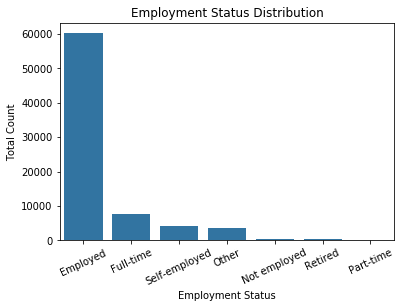

In [22]:
# plot the data
sb.countplot(data = plds, x = 'EmploymentStatus', color = sb.color_palette()[0])
plt.xticks(rotation = 25)
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Total Count')
plt.grid(False);

> Observation: We observe from the chart, that most people who were approved of loans are considered 'employed', followed by 'Full-Time'. Other loan applicants with other employment status and retired make up a small portion of the overall loans.

Next, we'll observe the distribution of the stated monthly income

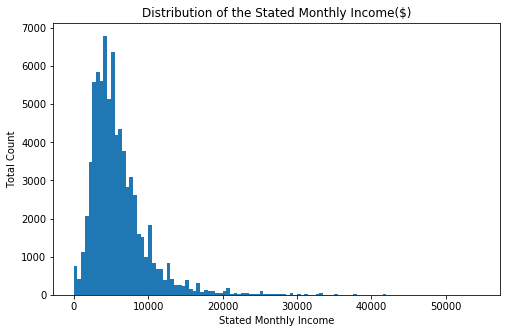

In [23]:
bins = np.arange(0, 55000, 500)

plt.figure(figsize=[8, 5])
plt.hist(data = plds, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Total Count')
plt.title('Distribution of the Stated Monthly Income($)')
plt.show()

> Observation: We observe that the distribution of the stated monthly income is skewed to the right. A large percentage are less than $20,000.

We'll then observe  the verifiable income

In [24]:
ver_inc = plds['IncomeVerifiable'].value_counts().index
vari = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = ver_inc)
plds['IncomeVerifiable'] = plds['IncomeVerifiable'].astype(vari)
plds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76970 entries, 1 to 113936
Data columns (total 7 columns):
LoanStatus               76970 non-null category
BorrowerAPR              76970 non-null float64
EmploymentStatus         76970 non-null category
StatedMonthlyIncome      76970 non-null float64
IncomeVerifiable         76970 non-null category
LoanOriginalAmount       76970 non-null int64
ProsperRating (Alpha)    76970 non-null object
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 5.7+ MB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


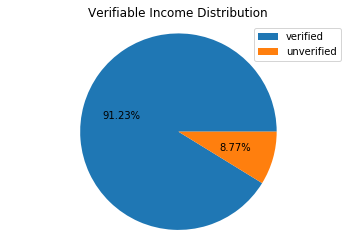

In [25]:
verifiable = pd.DataFrame(plds['IncomeVerifiable'].value_counts())
plt.pie(data = verifiable, x='IncomeVerifiable', autopct='%1.2f%%');
plt.axis('equal');
plt.title('Verifiable Income Distribution')
plt.legend(['verified', 'unverified'])
plt.show()

> Observation: From the pie chart, we can see that a majority of the borrowers' incomes are verifiable.

We'll then observe the loan original amount

In [26]:
plds['LoanOriginalAmount'].describe()

count    76970.000000
mean      9066.273171
std       6299.559451
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

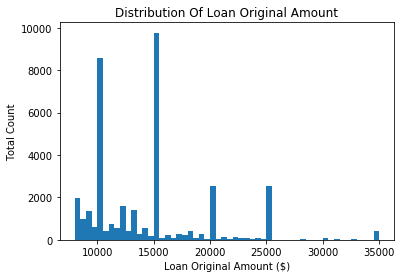

In [27]:
# use the mean as the starting point
bins = np.arange(8000, plds['LoanOriginalAmount'].max()+500, 500)
plt.hist(data = plds, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Total Count')
plt.title('Distribution Of Loan Original Amount')
plt.grid(False);

> Observation: There are very large spikes at 10k, 15k, 20k, 25k and 35k.

We'll observe the prosper rating

In [29]:
rating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
rate = pd.api.types.CategoricalDtype(categories = rating, ordered = True)
plds['ProsperRating (Alpha)'] = plds['ProsperRating (Alpha)'].astype(rate)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


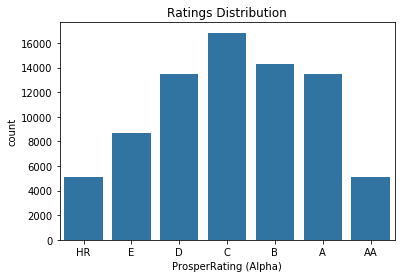

In [30]:
base_color = sb.color_palette()[0]
sb.countplot(data = plds, x = 'ProsperRating (Alpha)', color = base_color)
plt.title('Ratings Distribution')
plt.grid(False);

> Observation: The highest prosper rating is C which implies 4. 

## Bivariate Exploration

In this section, I will investigate the relationship between pairs of variables in the dataset using a function to combine the plots. 

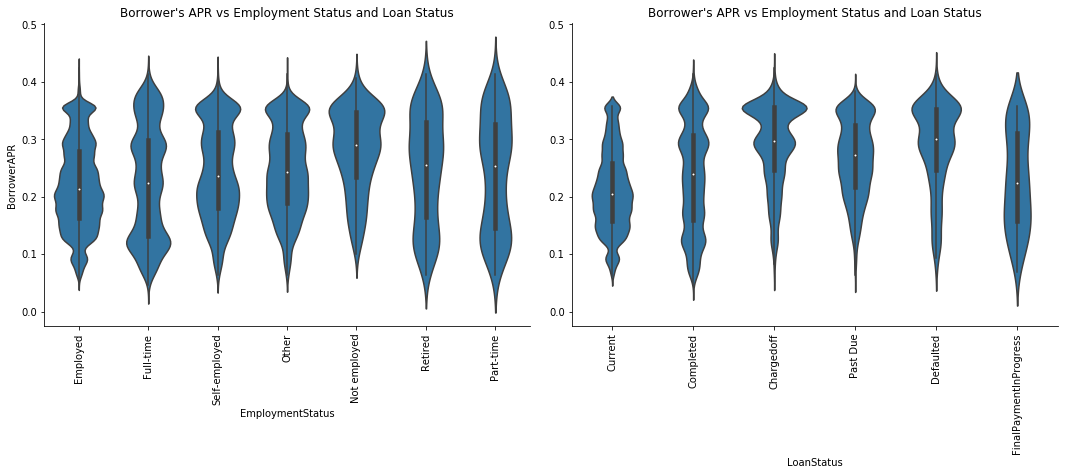

In [31]:
def violin(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)
    plt.title('Borrower\'s APR vs Employment Status and Loan Status')
    plt.xticks(rotation=90);
    
g = sb.PairGrid(data = plds, y_vars = ['BorrowerAPR'], x_vars = ['EmploymentStatus','LoanStatus'],
                size = 5, aspect = 1.5);
g.map(violin);

We'll examine a pairwise correlation between the numerical variables in our dataset. 

In [32]:
num = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount']

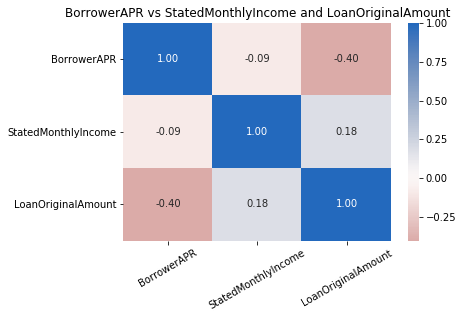

In [33]:
sb.heatmap(plds[num].corr(), annot = True, fmt = '0.2f',
          cmap = 'vlag_r', center = 0)
plt.title('BorrowerAPR vs StatedMonthlyIncome and LoanOriginalAmount')
plt.xticks(rotation = 30);

> Observation: The Borrower's APR and the Stated Monthly Income are negatively correlated (-0.09) which implies that the higher the income, the lower the APR. The correlation between the Borrower's APR and the Loan Amount is also negatively correlated (-0.40) which also implies that the higher the loan, the lower the APR. Invariably, we can see that the correlation between the Stated Income and Loan amount is positive (0.18), this is justified as the higher the income, the higher the loan you can acccess.

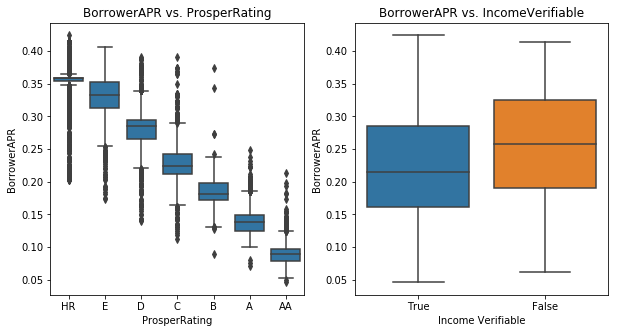

In [34]:
plt.figure(figsize = [10, 5]) 

plt.subplot(1, 2, 1)
color=sb.color_palette()[0]
sb.boxplot(data = plds, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR',color=color)
plt.title('BorrowerAPR vs. ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sb.boxplot(data = plds, x = 'IncomeVerifiable', y = 'BorrowerAPR',)
plt.title('BorrowerAPR vs. IncomeVerifiable')
plt.xlabel('Income Verifiable')
plt.ylabel('BorrowerAPR');

> Observation: From the first plot, we observe that the prosper rating is a good determinant of the borrower's APR. We can infer from the plot that the higher the rating, the lower the APR and otherwise. Also, Verified income has a lower APR.

Here, we'll observe the relationship between some categorical variables. 

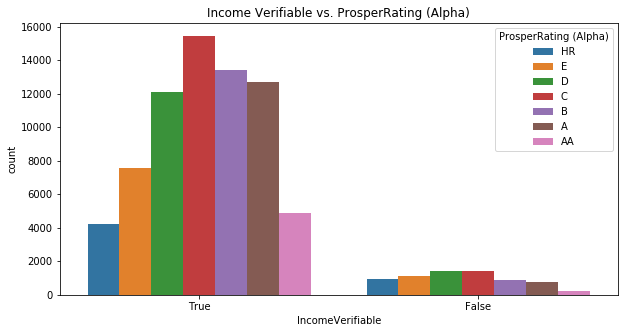

In [35]:
# Comparing 'LoanStatus' variable to the other categorical variables
plt.figure(figsize = [10, 5]) 

#subplot 1
#plt.subplot(2,2,1)
sb.countplot(data = plds, x = 'IncomeVerifiable', hue = 'ProsperRating (Alpha)')
plt.title('Income Verifiable vs. ProsperRating (Alpha)')
plt.show();

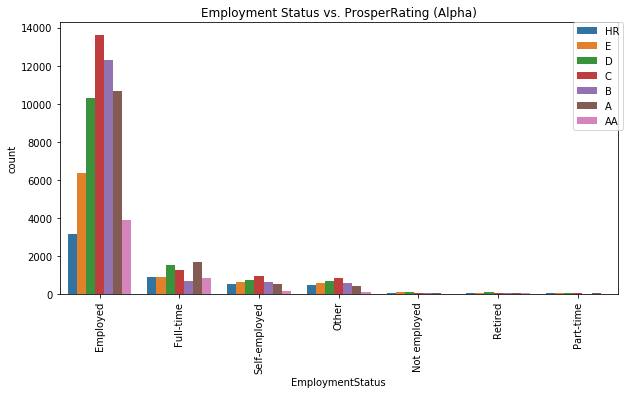

In [36]:
plt.figure(figsize = [10, 5])

sb.countplot(data = plds, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Employment Status vs. ProsperRating (Alpha)')
plt.show();

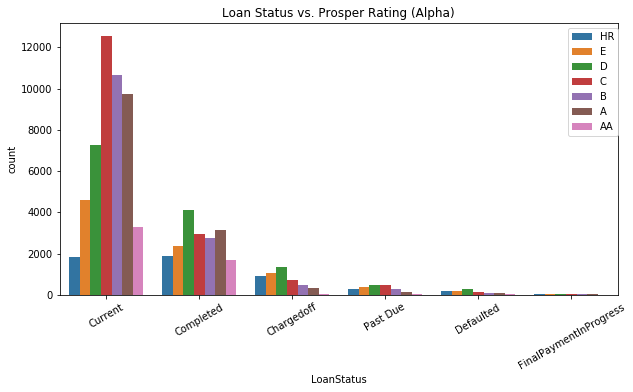

In [37]:
plt.figure(figsize = [10, 5])

sb.countplot(data = plds, x = 'LoanStatus', hue = 'ProsperRating (Alpha)')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Loan Status vs. Prosper Rating (Alpha)')
plt.show();

## Multivariate Exploration

In this section, I want to explore how prosper rating affects the Borrower's APR and Loan Status

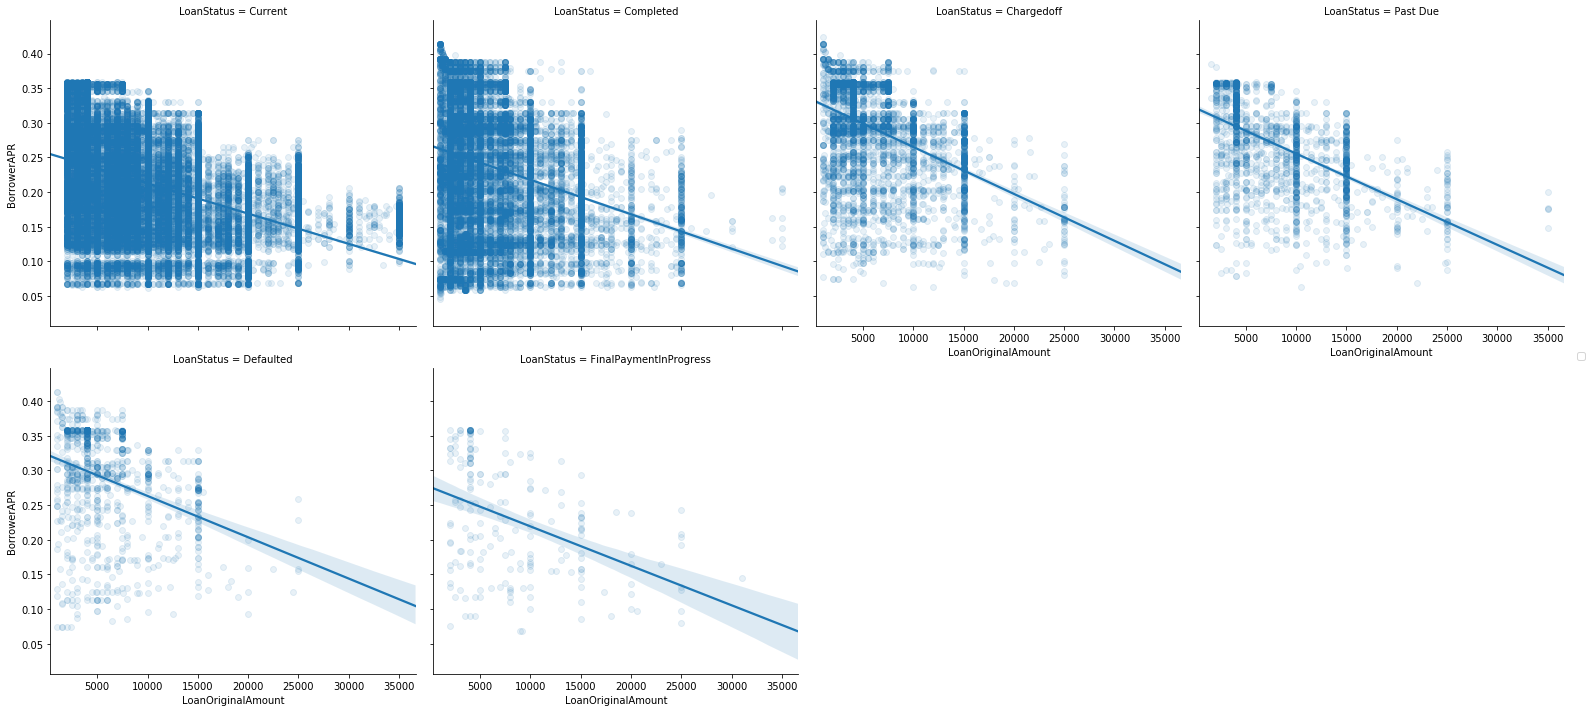

In [38]:
plds_grid = sb.FacetGrid(data = plds, aspect=1.1, size = 5, col = 'LoanStatus', col_wrap = 4)
plds_grid.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.04, scatter_kws = {'alpha':0.1});
plds_grid.add_legend();

In [ ]:
plds_grid = sb.FacetGrid(data = plds, aspect=1.1, size = 5, col = 'ProsperRating (Alpha)', col_wrap = 4)
plds_grid.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.04, scatter_kws = {'alpha':0.1});
plds_grid.add_legend();

In [ ]:
plt.figure(figsize = [8,5])
ax = sb.pointplot(data = plds, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.8)
plt.title('Borrower APR vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower APR')
plt.show();

## Conclusions
We observe from the plots and visualizations that, variables like "Prosper Rating", Stated Monthly Income, "Verifiable Income" and the Loan Amount influences the Borrower's APR.


## References

https://stackoverflow.com/questions/65489805/pie-missing-1-required-positional-argument-x
https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
https://github.com/Mr-Chang95/Loan_Data_Visualization/blob/main/Part_I_Exploration.ipynb
https://github.com/vbihare/Prosper-Data-Analysis/blob/master/exploration_ProsperData.ipynb
https://github.com/bluk16/Udacity-Data-Visualization-ProsperLoan/blob/master/loan_data_exploration.ipynb
